In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Visualization, EDA
# import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline
from IPython.display import Image


# Utility
import time
import datetime
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('Hn19_all.csv')

In [3]:
dfr = df[['BS1_1', 'BS12_37', 'BS12_1',
          'DI1_dg', 'DI3_dg', 'DC6_dg', 'HE_COPD', 'BP1', 'BE3_71', 'BE3_81']];
# ID 중복 없음

dfr.rename(columns = {
    'BS1_1': 'y1', 
    'BS12_37': 'y2', 
    'BS12_1': 'y3', 
    'DI1_dg': 'x1', 
    'DI3_dg': 'x2', 
    'DC6_dg': 'x3', 
    'HE_COPD': 'x4', 
    'BP1': 'x5', 
    'BE3_71': 'x6', 
    'BE3_81': 'x7'

}, inplace = True)

dfr = dfr.astype(str)

In [4]:
dfr['y1'].replace({'1.0': '0' ,
                   '3.0': '0',
                   '2.0': '1',
                  '8.0': np.nan,
                  '9.0': np.nan},inplace = True)

dfr['y2'].replace({'2.0': '0',
                   '1.0': '1',
                  '8.0': np.nan,
                  '9.0': np.nan},inplace = True)

dfr['y3'].replace({'2.0': '0',
                  '1.0': '1',
                  '8.0': np.nan,
                  '9.0': np.nan}, inplace = True)

dfr['x1'].replace({'1.0': '1',
                   '0.0': '0',
                  '8.0': np.nan},inplace = True)

dfr['x2'].replace({'0.0': '0',
                   '1.0': '1',
                   '8.0': np.nan,
                  '9.0': np.nan},inplace = True)

dfr['x3'].replace({'0.0': '0',
                   '1.0': '1',
                   '8.0': np.nan,
                  '9.0': np.nan},inplace = True)

dfr['x4'].replace({'1.0': '0',
                   '2.0': '1',
                   '3.0': '1',
                  '9.0': np.nan},inplace = True)


dfr['x5'].replace({'1.0': '10',
                   '2.0': '9', 
                   '3.0': '8',
                   '4.0': '7'}, inplace = True)
dfr['x5'].replace({
                   '10': '4',
                   '9': '3',
                   '8': '2',
                   '7': '1'}, inplace = True)
dfr['x5'].replace({'8.0': np.nan,
                  '9.0': np.nan},inplace = True)



dfr['x6'].replace({'1.0': '1',
                   '2.0': '0',
                  '8.0': np.nan,
                  '9.0': np.nan}, inplace = True)

dfr['x7'].replace({'1.0': '1',
                   '2.0': '0',
                  '8.0': np.nan,
                  '9.0': np.nan}, inplace = True)

In [5]:
df_R_smoke = dfr[['y1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']];
df_G_smoke = dfr[['y2', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']];
df_E_smoke = dfr[['y3', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']];


# y1: 흡연정도, x1: 스트레스정도, x2: 고혈압여부, x3: 폐기능여부, x4: 폐암여부, x5: 뇌졸증여부, x6: 일_강도_고, x7: 일_강도_중
# y2: 궐련형
# y3: 액상형

In [6]:
df_G_smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8110 entries, 0 to 8109
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y2      6190 non-null   float64
 1   x1      6296 non-null   float64
 2   x2      5938 non-null   float64
 3   x3      5935 non-null   float64
 4   x4      3280 non-null   float64
 5   x5      6677 non-null   float64
 6   x6      5928 non-null   float64
 7   x7      5928 non-null   float64
dtypes: float64(8)
memory usage: 507.0 KB


In [7]:
df_R_smoke = df_R_smoke.dropna()
df_G_smoke = df_G_smoke.dropna()
df_E_smoke = df_E_smoke.dropna()

In [8]:
print(df_R_smoke.shape, df_G_smoke.shape, df_E_smoke.shape)

(3170, 8) (3170, 8) (3170, 8)


In [9]:
# fname = 'df_R_smoke.csv'
# df_R_smoke.to_csv(fname, index = False)

# fname = 'df_G_smoke.csv'
# df_G_smoke.to_csv(fname, index = False)

# fname = 'df_E_smoke.csv'
# df_E_smoke.to_csv(fname, index = False)

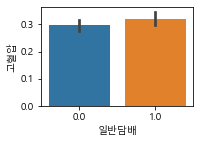

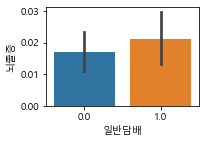

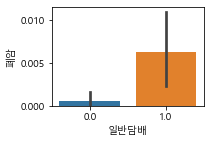

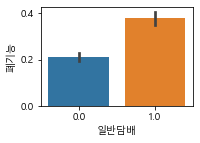

In [10]:
plt.subplot(2, 2, 1)
sns.barplot(x = 'y1', y='x1', data = df_R_smoke)
plt.xlabel('일반담배')
plt.ylabel('고혈압')
plt.show()


plt.subplot(2, 2, 2)
sns.barplot(x = 'y1', y='x2', data = df_R_smoke)
plt.xlabel('일반담배')
plt.ylabel('뇌졸증')
plt.show()

plt.subplot(2, 2, 3)
sns.barplot(x = 'y1', y='x3', data = df_R_smoke)
plt.xlabel('일반담배')
plt.ylabel('폐암')
plt.show()

plt.subplot(2, 2, 4)
sns.barplot(x = 'y1', y='x4', data = df_R_smoke)
plt.xlabel('일반담배')
plt.ylabel('폐기능')
plt.show()


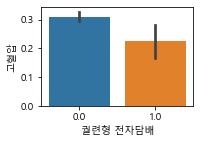

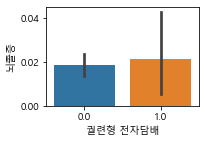

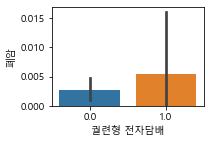

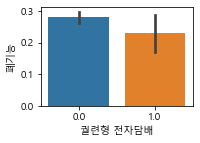

In [11]:
plt.subplot(2, 2, 1)
sns.barplot(x = 'y2', y='x1', data = df_G_smoke)
plt.xlabel('궐련형 전자담배')
plt.ylabel('고혈압')
plt.show()


plt.subplot(2, 2, 2)
sns.barplot(x = 'y2', y='x2', data = df_G_smoke)
plt.xlabel('궐련형 전자담배')
plt.ylabel('뇌졸증')
plt.show()

plt.subplot(2, 2, 3)
sns.barplot(x = 'y2', y='x3', data = df_G_smoke)
plt.xlabel('궐련형 전자담배')
plt.ylabel('폐암')
plt.show()

plt.subplot(2, 2, 4)
sns.barplot(x = 'y2', y='x4', data = df_G_smoke)
plt.xlabel('궐련형 전자담배')
plt.ylabel('폐기능')
plt.show()


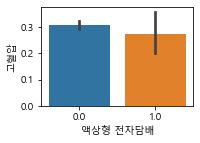

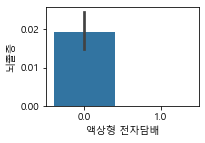

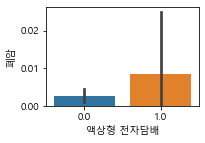

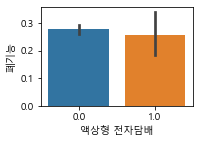

In [12]:
plt.subplot(2, 2, 1)
sns.barplot(x = 'y3', y='x1', data = df_E_smoke)
plt.xlabel('액상형 전자담배')
plt.ylabel('고혈압')
plt.show()


plt.subplot(2, 2, 2)
sns.barplot(x = 'y3', y='x2', data = df_E_smoke)
plt.xlabel('액상형 전자담배')
plt.ylabel('뇌졸증')
plt.show()

plt.subplot(2, 2, 3)
sns.barplot(x = 'y3', y='x3', data = df_E_smoke)
plt.xlabel('액상형 전자담배')
plt.ylabel('폐암')
plt.show()

plt.subplot(2, 2, 4)
sns.barplot(x = 'y3', y='x4', data = df_E_smoke)
plt.xlabel('액상형 전자담배')
plt.ylabel('폐기능')
plt.show()


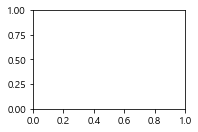

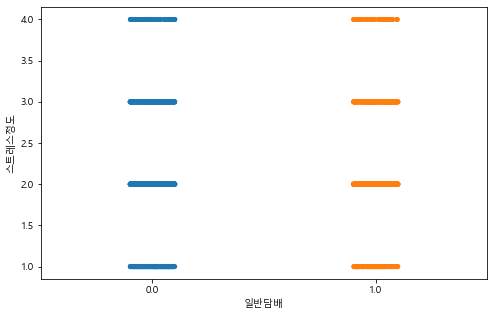

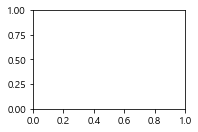

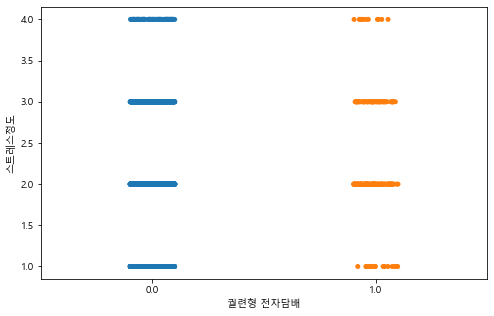

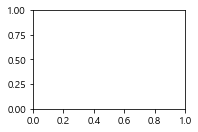

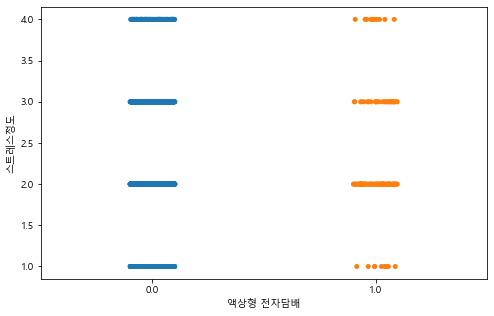

In [13]:
plt.subplot(2, 2, 1)
fig, ax = plt.subplots(figsize=(8, 5))
sns.stripplot(x='y1', y='x5', data=df_R_smoke)
plt.xlabel('일반담배')
plt.ylabel('스트레스정도')
plt.show()

plt.subplot(2, 2, 2)
fig, ax = plt.subplots(figsize=(8, 5))
sns.stripplot(x='y2', y='x5', data=df_G_smoke)
plt.xlabel('궐련형 전자담배')
plt.ylabel('스트레스정도')
plt.show()

plt.subplot(2, 2, 3)
fig, ax = plt.subplots(figsize=(8, 5))
sns.stripplot(x='y3', y='x5', data=df_E_smoke)
plt.xlabel('액상형 전자담배')
plt.ylabel('스트레스정도')
plt.show()

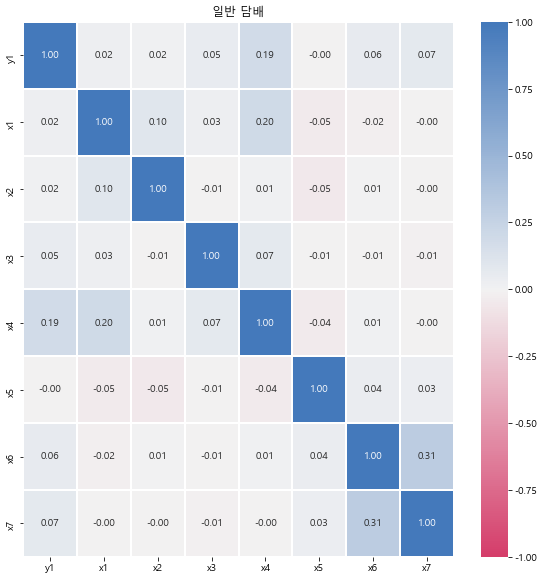

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df_R_smoke.corr(), vmin=-1, vmax=1,
                 annot=True, fmt=".2f",
                 linewidths=1,
                 cmap=sns.diverging_palette(0, 250, as_cmap=True),
                 ax=ax)
plt.tight_layout()
plt.title('일반 담배')
plt.show()

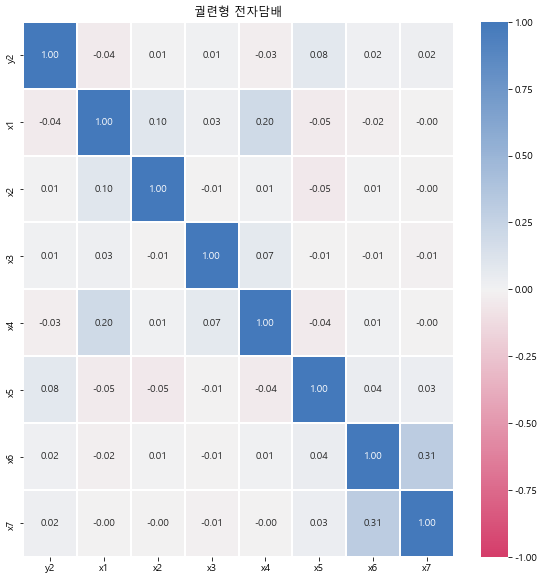

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df_G_smoke.corr(), vmin=-1, vmax=1,
                 annot=True, fmt=".2f",
                 linewidths=1,
                 cmap=sns.diverging_palette(0, 250, as_cmap=True),
                 ax=ax)
plt.tight_layout()
plt.title('궐련형 전자담배')
plt.show()

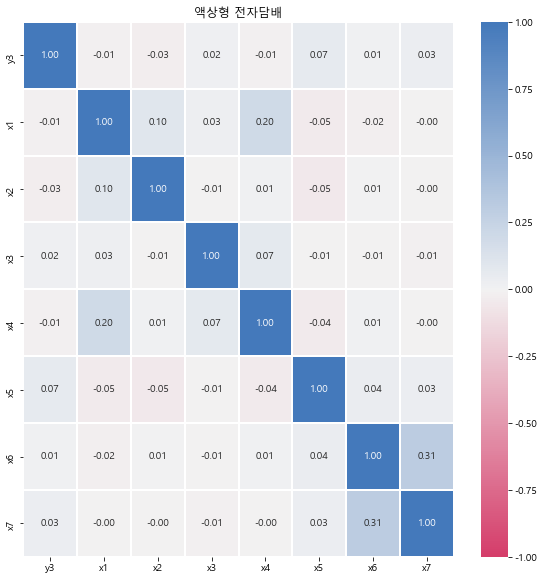

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df_E_smoke.corr(), vmin=-1, vmax=1,
                 annot=True, fmt=".2f",
                 linewidths=1,
                 cmap=sns.diverging_palette(0, 250, as_cmap=True),
                 ax=ax)
plt.tight_layout()
plt.title('액상형 전자담배')
plt.show()